In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datamunge/sign-language-mnist")
print("Path to dataset files:", path)

import pandas as pd
import numpy as np

Path to dataset files: /root/.cache/kagglehub/datasets/datamunge/sign-language-mnist/versions/1


In [3]:
train_df = pd.read_csv(path + "/sign_mnist_train.csv")
test_df = pd.read_csv(path + "/sign_mnist_test.csv")
print(train_df.shape[0] , test_df.shape[0])

27455 7172


In [12]:
y_train = train_df["label"]
y_test = test_df["label"]

X_train = train_df.drop("label", axis=1)
X_test = test_df.drop("label", axis=1)
X_train = X_train / 255
X_test = X_test / 255
X_train = np.array(X_train)
X_test = np.array(X_test)

In [13]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [14]:
# Train a simple MLP
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def build_mlp(hidden_layer_sizes,solver='sgd'):
    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes, 
        max_iter=1000, 
        alpha=1e-4,
        solver=solver, 
        verbose=10, 
        tol=1e-4, 
        random_state=1,
        learning_rate_init=.01,
        learning_rate='adaptive',
        activation='relu',
    )
    return model

def train_mlp(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

def classify(model):
    # draw loss curve 
    plt.figure(figsize=(16, 9))
    plt.plot(model.loss_curve_)

    # print accuracy and f1 score in percentage
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    print("Accuracy: ", accuracy)
    print("F1 score: ", f1)

    # plot confusion matrix
    y_pred = model.predict(X_test)
    y_test_label = np.argmax(y_test, axis=1)  # Convert to label indicator format
    y_pred_label = np.argmax(y_pred, axis=1)  # Convert to label indicator format
    cm = confusion_matrix(y_test_label, y_pred_label)
    plt.figure(figsize=(16, 9))
    plt.matshow(cm)
    plt.show()

def pipeline(*args):
    model = build_mlp(*args)
    model = train_mlp(model, X_train, y_train)
    classify(model)
    return model

Iteration 1, loss = 3.99718070
Iteration 2, loss = 2.90412666
Iteration 3, loss = 2.41082993
Iteration 4, loss = 2.06774464
Iteration 5, loss = 1.80475950
Iteration 6, loss = 1.59329353
Iteration 7, loss = 1.42309699
Iteration 8, loss = 1.28023754
Iteration 9, loss = 1.15586227
Iteration 10, loss = 1.05046963
Iteration 11, loss = 0.95685760
Iteration 12, loss = 0.87458786
Iteration 13, loss = 0.79661252
Iteration 14, loss = 0.72616098
Iteration 15, loss = 0.67015425
Iteration 16, loss = 0.61243441
Iteration 17, loss = 0.56548460
Iteration 18, loss = 0.52103734
Iteration 19, loss = 0.47828055
Iteration 20, loss = 0.44321783
Iteration 21, loss = 0.40841827
Iteration 22, loss = 0.37734323
Iteration 23, loss = 0.34969342
Iteration 24, loss = 0.32579817
Iteration 25, loss = 0.30345212
Iteration 26, loss = 0.28177108
Iteration 27, loss = 0.26441349
Iteration 28, loss = 0.24736988
Iteration 29, loss = 0.23101105
Iteration 30, loss = 0.21604330
Iteration 31, loss = 0.20337587
Iteration 32, los

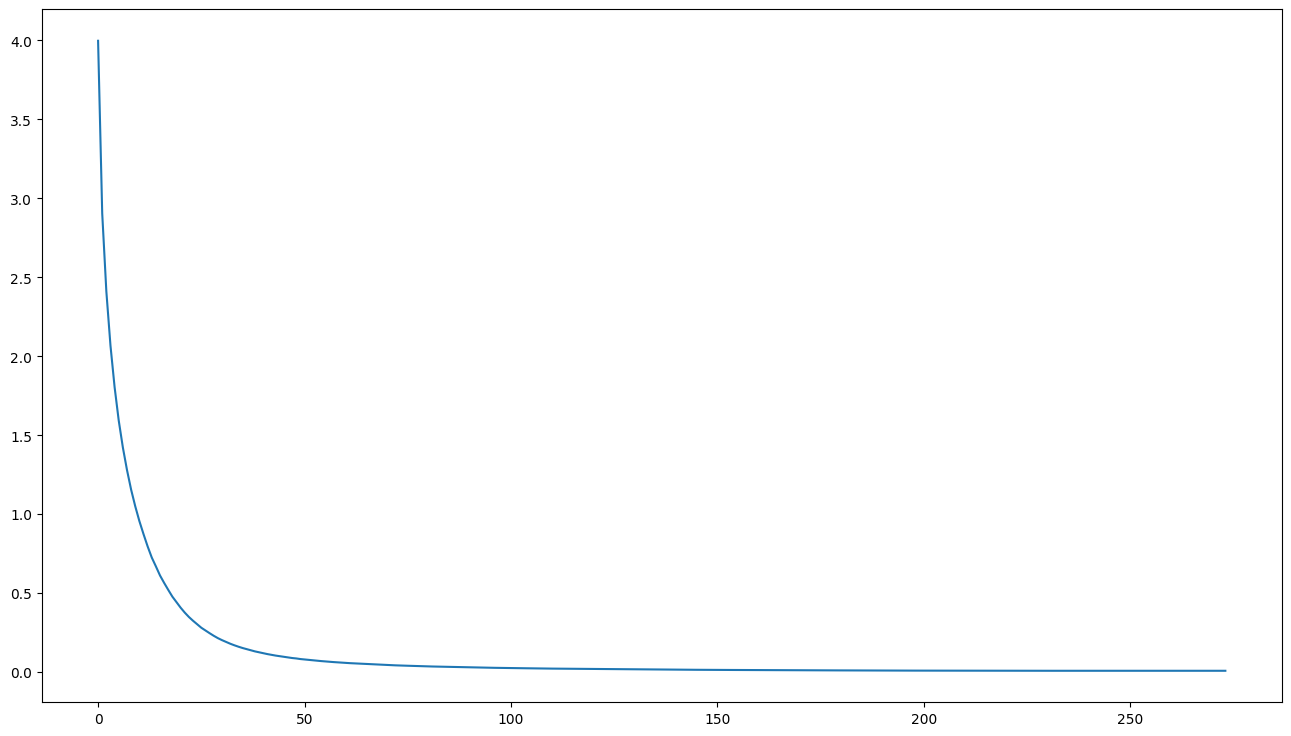

<Figure size 1600x900 with 0 Axes>

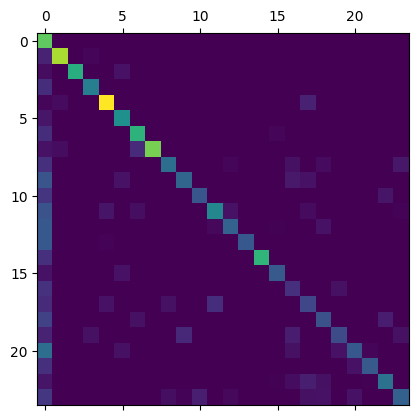

In [6]:
m1 = pipeline((100,))

Iteration 1, loss = 4.68854550
Iteration 2, loss = 3.93388795
Iteration 3, loss = 3.70981012
Iteration 4, loss = 3.58563452
Iteration 5, loss = 3.48489293
Iteration 6, loss = 3.39067534
Iteration 7, loss = 3.30672291
Iteration 8, loss = 3.20907436
Iteration 9, loss = 3.08132222
Iteration 10, loss = 3.00160247
Iteration 11, loss = 2.90169817
Iteration 12, loss = 2.80916759
Iteration 13, loss = 2.73988457
Iteration 14, loss = 2.68402693
Iteration 15, loss = 2.58279242
Iteration 16, loss = 2.51779742
Iteration 17, loss = 2.42640649
Iteration 18, loss = 2.37381713
Iteration 19, loss = 2.25904147
Iteration 20, loss = 2.17915375
Iteration 21, loss = 2.11804955
Iteration 22, loss = 2.07090419
Iteration 23, loss = 2.01835437
Iteration 24, loss = 1.97967652
Iteration 25, loss = 1.94600619
Iteration 26, loss = 1.88251464
Iteration 27, loss = 1.79439700
Iteration 28, loss = 1.78479889
Iteration 29, loss = 1.75061678
Iteration 30, loss = 1.65797947
Iteration 31, loss = 1.66543430
Iteration 32, los

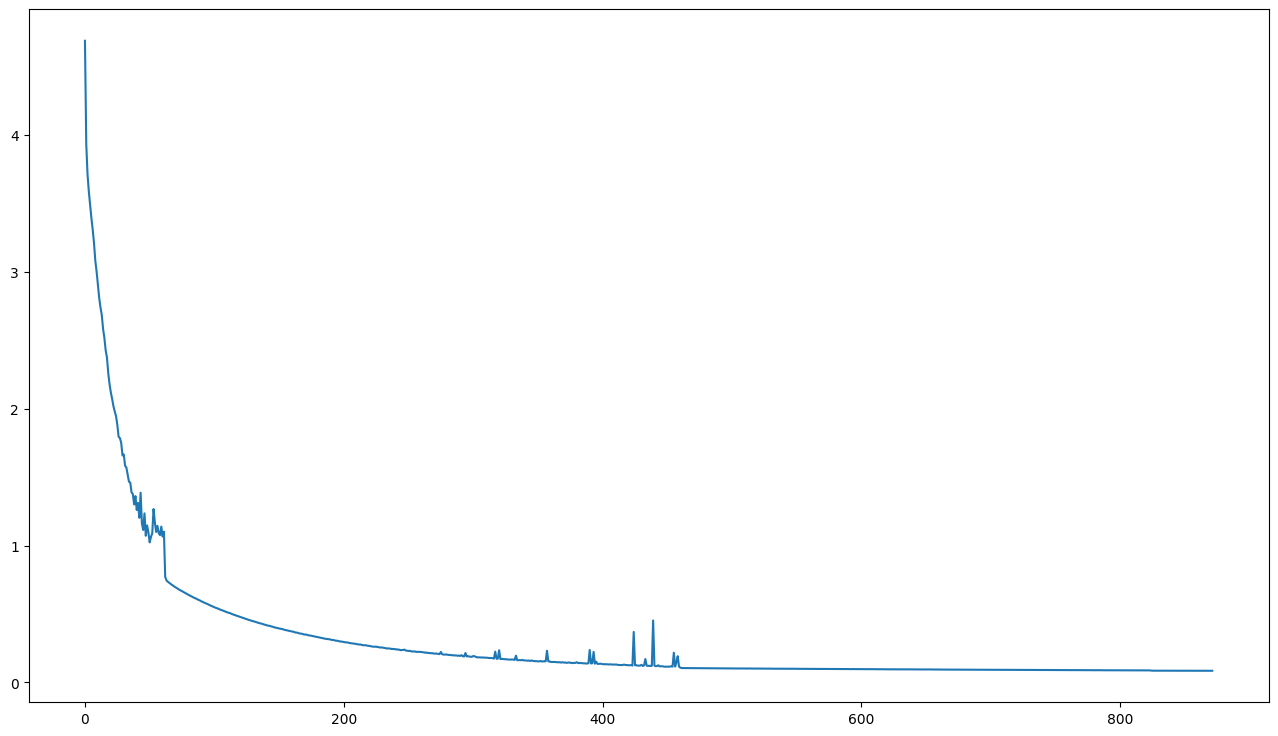

<Figure size 1600x900 with 0 Axes>

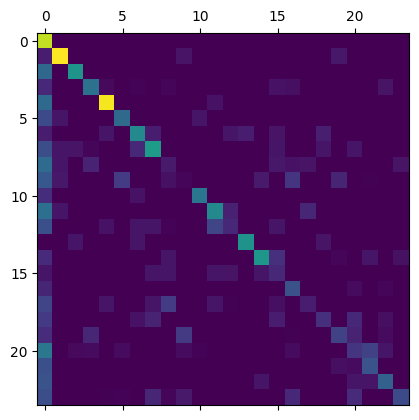

MLPClassifier(hidden_layer_sizes=(25, 10), learning_rate='adaptive',
              learning_rate_init=0.01, max_iter=1000, random_state=1,
              solver='sgd', verbose=10)

In [7]:
pipeline((80,10))

# Tensorflow NN

In [15]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [16]:
# make pipeline with tensorflow

EPOCHS = 150
def build_mlp_tf(hidden_layer_sizes):
    model = tf.keras.Sequential()    
    model.add(tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)))
    for size in hidden_layer_sizes:
        model.add(tf.keras.layers.Dense(size, activation=tf.nn.relu , kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(tf.keras.layers.Dense(24, activation=tf.nn.softmax))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

def train_mlp_tf(model, X_train, y_train):
    history = model.fit(X_train, y_train, epochs=EPOCHS , validation_data = (X_test, y_test))
    return model , history

def classify(model, history):
    # draw loss curve 
    plt.figure(figsize=(16, 9))
    epochs = [i for i in range(EPOCHS)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    fig.set_size_inches(16,9)

    ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
    ax[1].set_title('Testing Accuracy & Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")

    # print accuracy and f1 score in percentage
    y_pred = model.predict(X_test)
    accuracy = model.evaluate(X_test, y_test)[1]
    y_pred_label = np.argmax(y_pred, axis=1)  # Convert to label indicator format
    y_test_label = np.argmax(y_test, axis=1)  # Convert to label indicator format
    f1 = f1_score(y_test_label, y_pred_label, average='macro')
    print("Accuracy: ", accuracy)
    print("F1 score: ", f1)

    # plot confusion matrix
    cm = confusion_matrix(y_test_label, y_pred_label)
    plt.figure(figsize=(16, 9))
    plt.matshow(cm)
    plt.show()

def pipeline_tf(*args):
    model = build_mlp_tf(*args)
    model , history = train_mlp_tf(model, X_train, y_train)
    classify(model, history)
    return model , history

/mnt/c/Users/kkiko/Desktop/TAA/projs/FAA_P1/.venvWSL/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 24)             │         1,224 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,774 (331.15 KB)

 Trainable params: 84,774 (331.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1446 - loss: 4.4088 - val_accuracy: 0.2687 - val_loss: 2.6026
Epoch 2/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3351 - loss: 2.4288 - val_accuracy: 0.3769 - val_loss: 2.3700
Epoch 3/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3846 - loss: 2.2816 - val_accuracy: 0.3483 - val_loss: 2.3896
Epoch 4/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4153 - loss: 2.2111 - val_accuracy: 0.4709 - val_loss: 2.1849
Epoch 5/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 860us/step - accuracy: 0.4391 - loss: 2.1298 - val_accuracy: 0.4378 - val_loss: 2.2054
Epoch 6/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4741 - loss: 2.0460 - val_accuracy: 0.4099 - val_loss: 2.1993
Epoch 7/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4953 - loss: 1.9872 - val_accuracy: 0.4986 - val_loss: 2.0229
Epoch 8/150
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5190 - loss: 1.9270 - val_ac

<Figure size 1600x900 with 0 Axes>

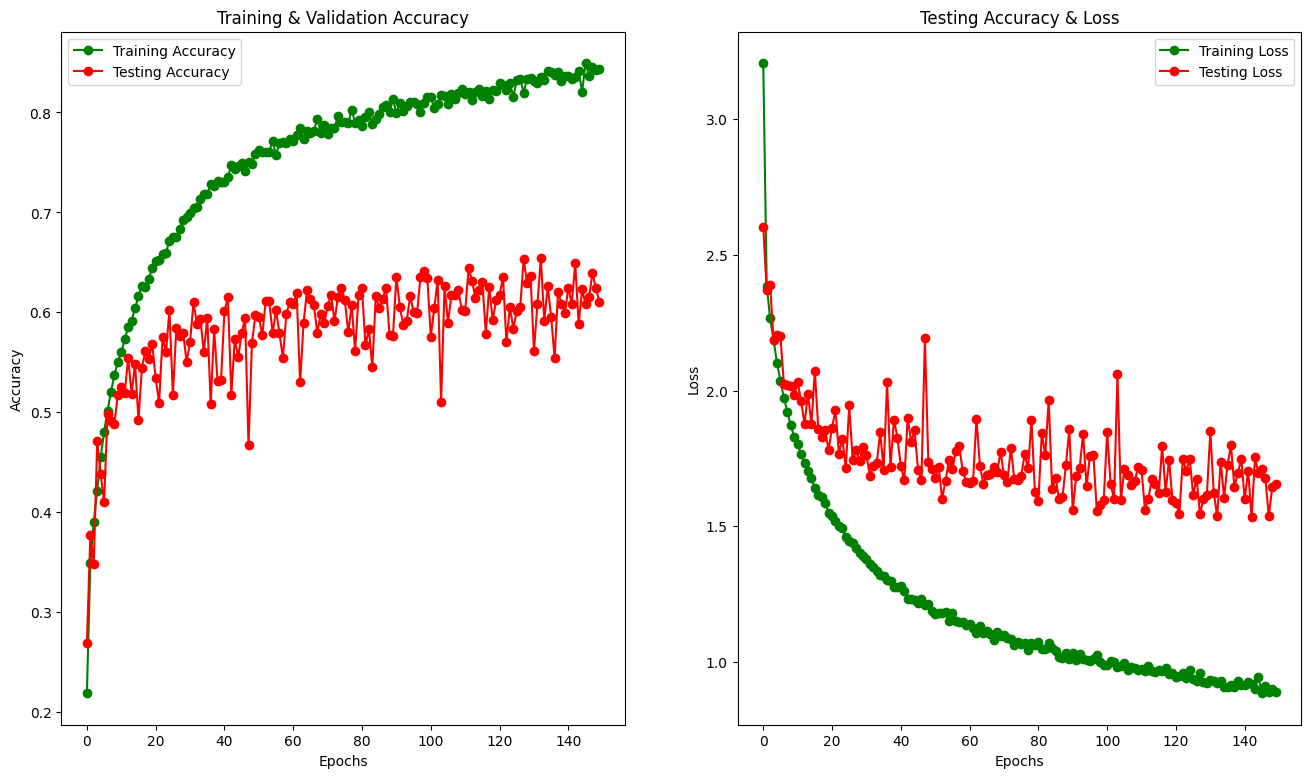

<Figure size 1600x900 with 0 Axes>

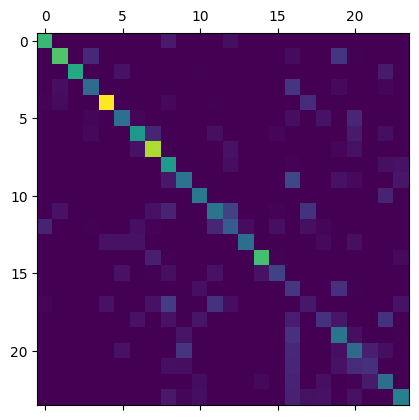

In [20]:
model_tf , history_tf = pipeline_tf((100,50)) # MUCH BIGGER SIZE

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.05, # Randomly zoom image 
        width_shift_range=0.07,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.07,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

EPOCHS = 100

X_train_images = X_train.reshape(-1,28,28,1)
X_test_images = X_test.reshape(-1,28,28,1)
datagen.fit(X_train_images)

model_tf_datagen = tf.keras.Sequential()    
model_tf_datagen.add(tf.keras.layers.Flatten(input_shape=( 28, 28, 1)))
for size in (100,70):
    model_tf_datagen.add(tf.keras.layers.Dense(size, activation=tf.nn.relu))
model_tf_datagen.add(tf.keras.layers.Dense(24, activation=tf.nn.softmax))
model_tf_datagen.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model_tf_datagen.summary()
history_tf_datagen = model_tf_datagen.fit(datagen.flow(X_train_images, y_train, batch_size=128), epochs=EPOCHS , validation_data = (X_test_images, y_test), callbacks = [learning_rate_reduction])

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 70)             │         7,070 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 24)             │         1,704 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,274 (340.91 KB)

 Trainable params: 87,274 (340.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.1395 - loss: 2.9246 - val_accuracy: 0.3883 - val_loss: 1.9938 - learning_rate: 0.0010
Epoch 2/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3857 - loss: 1.9987 - val_accuracy: 0.4833 - val_loss: 1.6503 - learning_rate: 0.0010
Epoch 3/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4718 - loss: 1.6884 - val_accuracy: 0.5590 - val_loss: 1.4342 - learning_rate: 0.0010
Epoch 4/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5215 - loss: 1.5172 - val_accuracy: 0.6000 - val_loss: 1.2790 - learning_rate: 0.0010
Epoch 5/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5610 - loss: 1.3908 - val_accuracy: 0.6076 - val_loss: 1.1511 - learning_rate: 0.0010
Epoch 6/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5866 - loss: 1.2912 - val_accuracy: 0.6414 - val_loss: 1.0481 - learning_rate: 0.0010
Epoch 7/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6202 - l

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 784), dtype=float32). Expected shape (None, 28, 28, 1), but input has incompatible shape (32, 784)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 784), dtype=float32)
  • training=False
  • mask=None

<Figure size 1600x900 with 0 Axes>

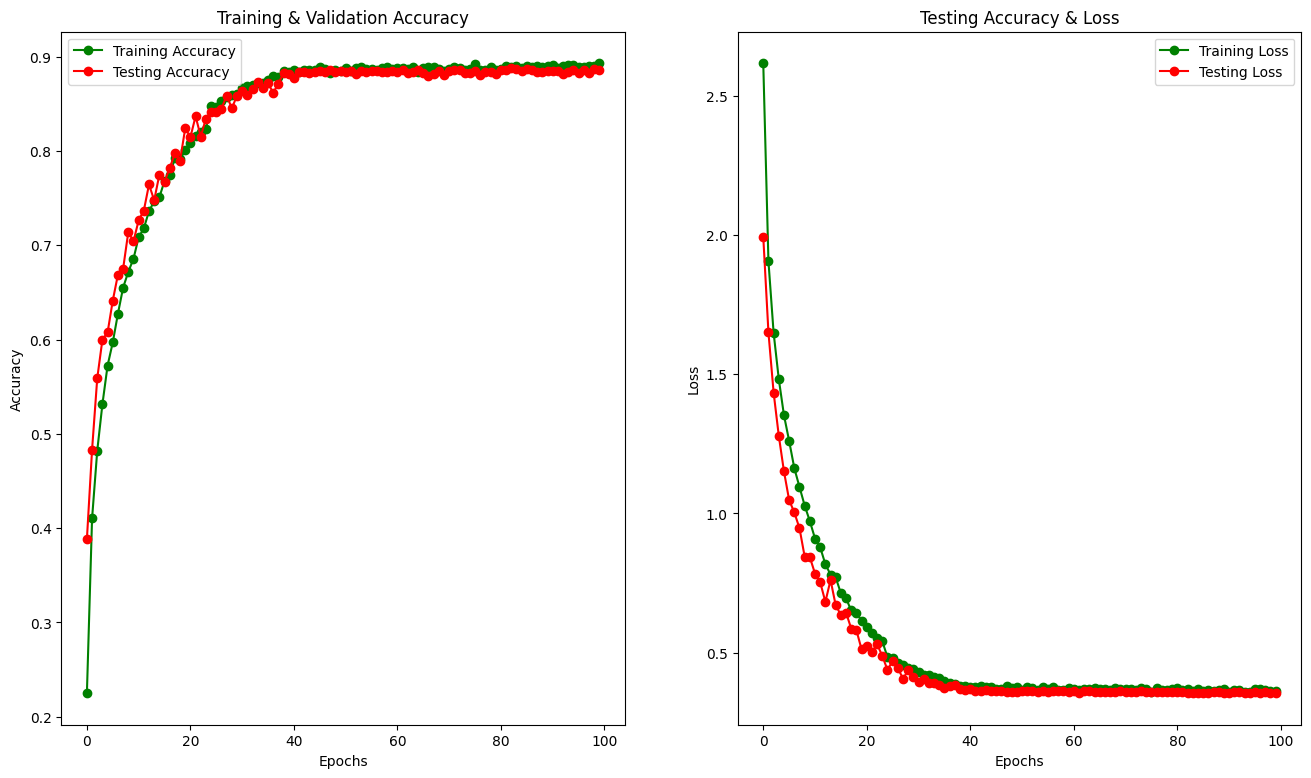

In [28]:
classify(model_tf_datagen, history_tf_datagen)